<a href="https://colab.research.google.com/github/samirgadkari/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

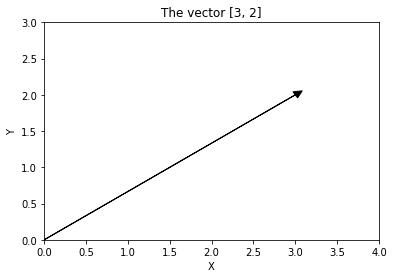

In [41]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array([3, 2])

ax = plt.axes()
ax.arrow(0, 0, a[0], a[1], head_width = 0.1, head_length = 0.1, fc = 'k')
ax.set_xlim(0, 4)
ax.set_ylim(0, 3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('The vector [3, 2]')
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [42]:
b = np.array([17, -4, -2, -1])
print('Norm of b is:', np.linalg.norm(b))

# The norm of b represents the length of b

Norm of b is: 17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [43]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

print('c . d:', np.dot(c, d))

c . d: 42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [44]:
e = np.array([[7, 4, 2], [1, 3, -1], [2, 6, -4]])
print('inv(e):\n', np.linalg.inv(e))
print('transpose(e):\n', np.transpose(e))

inv(e):
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
transpose(e):
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [45]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [46]:
print('mean:\n', df.mean())
print('\nvariance:\n', df.var())
print('\nstd dev:\n', df.std())

mean:
 customers    1135.714286
snow            2.714286
dtype: float64

variance:
 customers    98761.904762
snow             8.571429
dtype: float64

std dev:
 customers    314.264069
snow           2.927700
dtype: float64


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
# The variances are not comparable because
# the scales on both are different.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [48]:
print('covariance matrix:\n', np.cov(customers, snow, rowvar = False))

covariance matrix:
 [[9.87619048e+04 6.70238095e+02]
 [6.70238095e+02 8.57142857e+00]]


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [49]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [50]:
# Only numeric columns in dataframe for passing to PCA

X = df.drop('Country', axis=1)
X.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [51]:
# We'll also turn the X dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_X = X.values
print(numpy_X)

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]]


In [52]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.2)


In [53]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

X_scaled = pd.DataFrame(scalar.fit_transform(X), columns = X.columns)
print('\nX_scaled shape:', X_scaled.shape)
X_scaled.head()


X_scaled shape: (4, 17)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,0.104998,-0.051917,-0.017495,-0.644322,0.658275,-0.138303,-0.632429,0.644585,0.737407,-0.450076,0.863312,-0.259546,0.377736,-0.336265,0.805477,-0.435231,0.130551
1,0.841823,1.609440,-1.277169,1.679463,0.535805,0.968122,1.535899,1.152440,0.929297,0.435696,1.093528,1.198856,1.401682,0.084066,1.171603,-1.404236,1.547958
2,0.716563,-0.467257,-0.227441,-0.855575,0.535805,0.746837,-1.097071,-0.332059,-0.057567,-1.335847,-0.709834,0.543811,-0.496364,1.513193,-0.878702,1.190727,-0.540853
3,-1.663384,-1.090266,1.522105,-0.179565,-1.729885,-1.576656,0.193601,-1.464967,-1.609137,1.350227,-1.247006,-1.483121,-1.283054,-1.260994,-1.098378,0.648741,-1.137656


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [54]:
from sklearn.decomposition import PCA

pca = PCA()  # PCA for all dimensions
pca.fit(X_scaled)
print('Eigenvalues:\n', pca.explained_variance_)
print('% ratio:\n', ['{:.2%}'.format(x) for x in pca.explained_variance_ratio_])

Eigenvalues:
 [1.54876508e+01 5.63749203e+00 1.54152380e+00 2.97764819e-31]
% ratio:
 ['68.33%', '24.87%', '6.80%', '0.00%']


In [0]:
# From this we can see that the PCA for the first two components should be enough.
# Also, this is what we were asked, so let's find PCA for 2 components 
# and see what we get

In [56]:
pca = PCA(2)  # PCA for 2 dimensions
pca.fit(X_scaled)
print('Eigenvalues:\n', pca.explained_variance_)
print('% ratio:\n', ['{:.2%}'.format(x) for x in pca.explained_variance_ratio_])
transformed = pd.DataFrame(
                pca.transform(X_scaled), 
                columns = ['PCA ' + str(x) for x in range(1,3)])
print('\ntransformed shape:', transformed.shape)
transformed

Eigenvalues:
 [15.48765084  5.63749203]
% ratio:
 ['68.33%', '24.87%']

transformed shape: (4, 2)


,PCA 1,PCA 2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


In [0]:
# Interesting - The values for PCA1 and PCA2 come out to be the same.
# I don't think we could have used those values since our transformed
# matrix should use just 2 dimensions.

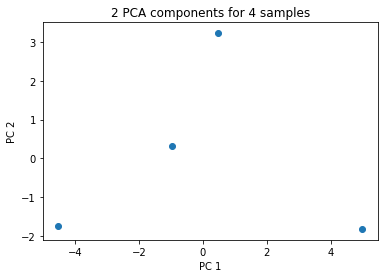

In [58]:
plt.scatter(transformed['PCA 1'], transformed['PCA 2']);
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('2 PCA components for 4 samples')
plt.show()

In [0]:
# We only have 4 samples with many more features.
# In this case, if we wanted we could have used all 4 PCA values.
# Actually, our eigenvalues showed that PCA4 did not have any
# variance, so we could have used 3 PCA values here.
# There's not much data here, so there is no issue with
# processing time, and we would get all of the variance.

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [60]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
# We'll also turn the dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_points = points.values
# print(numpy_points)

In [62]:
points.shape

(200, 2)

In [63]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [64]:
import seaborn as sns

print('seaborn version:', sns.__version__)

seaborn version: 0.9.0


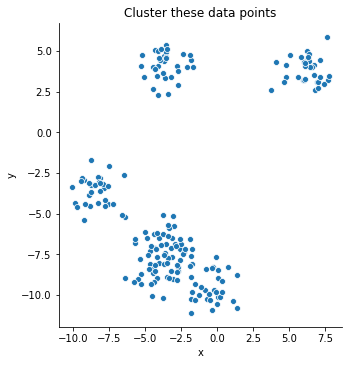

In [65]:
# Take a look at the points since they're in 2-D.
# No need to do PCA on them.

sns.relplot(x = 'x', y = 'y', data=points);
plt.title('Cluster these data points');

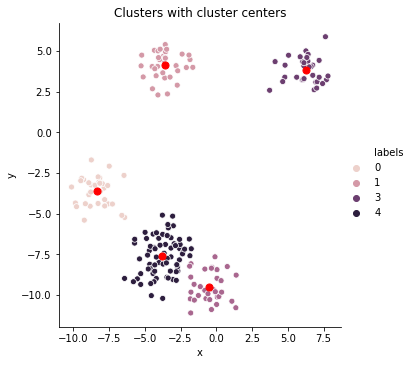

In [66]:
# Seems like there are 5 clusters.
# Use K-Means to cluster them

from sklearn.cluster import KMeans

km = KMeans(n_clusters = 5)
km = km.fit(points)

clusters = points.copy()
clusters['labels'] = km.labels_    

# print('cluster_centers_:', km.cluster_centers_)
xs, ys = zip(*km.cluster_centers_)

sns.relplot('x', 'y', hue = 'labels', 
            data = clusters)
plt.scatter(xs, ys, color = 'red', s = 50)
plt.title('Clusters with cluster centers')
plt.show()

